In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/Data Visualization/Data-Preparation-and-Visualization/8.ML-LinearRegression/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [19]:
df['quality_num'] = [0 if x == 'bad' else 1 for x in df['quality']]

In [21]:
df.drop(['quality'], axis=1, inplace = True)

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_num
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_num'],
      dtype='object')

In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_num             0
dtype: int64

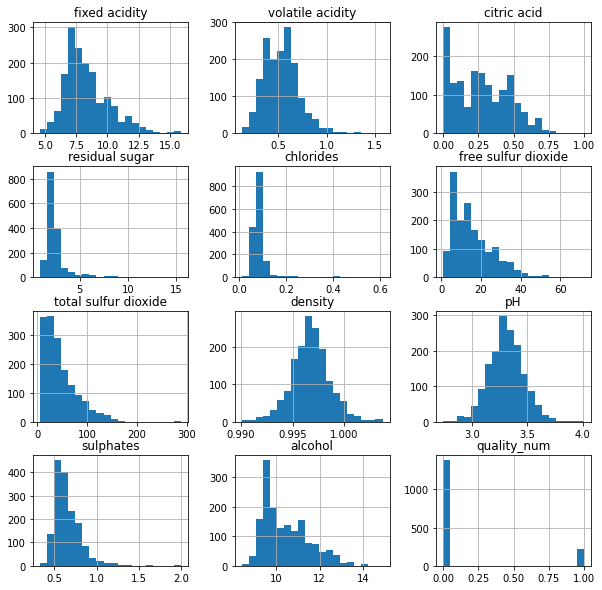

In [25]:
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize= (10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


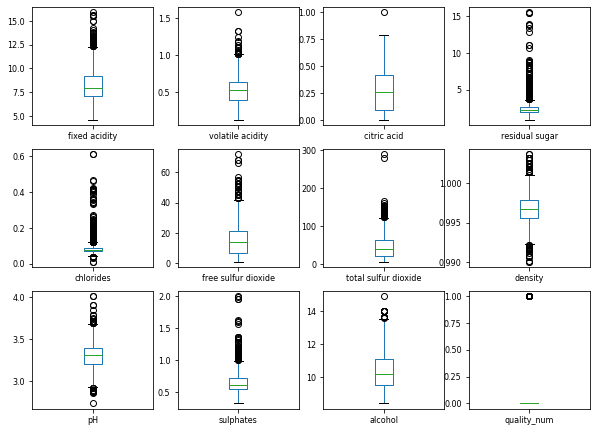

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

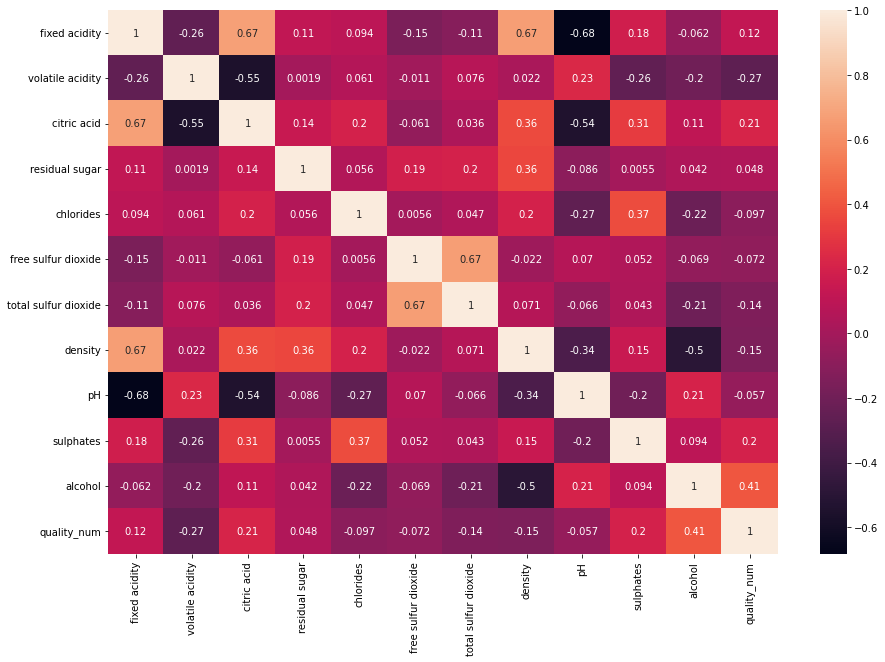

In [27]:
import seaborn
plt.figure(figsize=[15,10])
seaborn.heatmap(df.corr(),annot=True)

In [28]:
data = df.copy()

#Corr

In [29]:
corr_matrix = df.corr().abs()

In [30]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [31]:
upper

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_num
fixed acidity,NaN,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.120061
volatile acidity,NaN,NaN,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.270712
citric acid,NaN,NaN,NaN,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.214716
residual sugar,NaN,NaN,NaN,NaN,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.047779
chlorides,NaN,NaN,NaN,NaN,NaN,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.097308
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.667666,0.021946,0.070377,0.051658,0.069408,0.071747
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071269,0.066495,0.042947,0.205654,0.139517
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341699,0.148506,0.496180,0.150460
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196648,0.205633,0.057283
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093595,0.199485


In [32]:
to_drop = [column for column in upper.columns if any(upper[column] < 0.05)]

to_drop

['residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality_num']

In [33]:
to_drop = to_drop[:-1]
to_drop

['residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [34]:
data.drop(to_drop, axis=1, inplace=True)

# Outlier

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


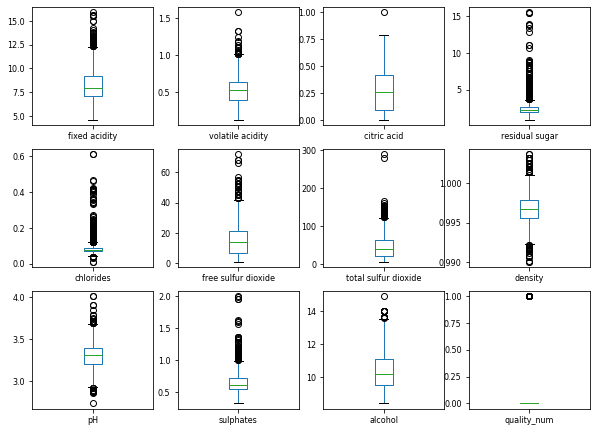

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [36]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
dat = lof.fit_predict(data)
# select all rows that are not outliers
mask = dat != -1
data = data[mask]

In [37]:
len(df), len(data)

(1599, 1532)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


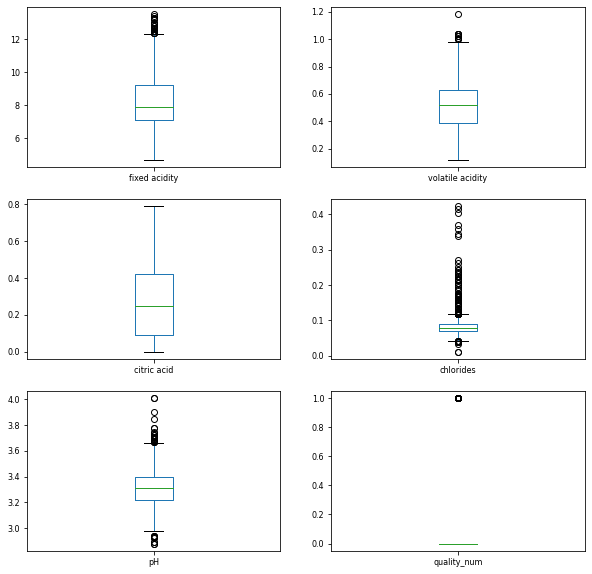

In [38]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [41]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'quality_num'],
      dtype='object')

In [42]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [65]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
data['quality_num'].value_counts()

0    1321
1     211
Name: quality_num, dtype: int64

In [70]:
count = 0
for x in y_test:
  if x == 1:
    count += 1
print(count)

39


# SVC

In [55]:
#Without Hyper Parameters Tuning
#importing module
from sklearn import svm
#making the instance
model_svc = svm.SVC(random_state=42)
#learning
model_svc.fit(X_train,y_train)
#Prediction
prediction=model_svc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))

Accuracy: 0.8729641693811075
Confusion Metrix:
 [[268  39]
 [  0   0]]


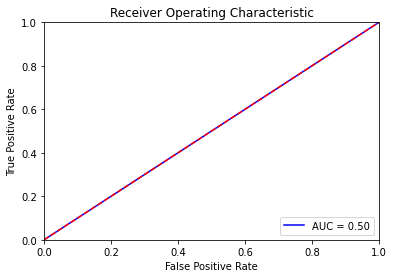

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

pred = model_svc.predict(X_test)
fp, tp, thresholds = roc_curve(y_test, pred)
roc_auc = metrics.auc(fp, tp)
plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
print("accuracy: ", metrics.accuracy_score(y_test, prediction))
print("precision: ", metrics.precision_score(y_test, prediction)) 
print("recall: ", metrics.recall_score(y_test, prediction))
print("f1: ", metrics.f1_score(y_test, prediction))
print("area under curve (auc): ", metrics.roc_auc_score(y_test, prediction))

accuracy:  0.8729641693811075
precision:  0.0
recall:  0.0
f1:  0.0
area under curve (auc):  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       268
           1       0.00      0.00      0.00        39

    accuracy                           0.87       307
   macro avg       0.44      0.50      0.47       307
weighted avg       0.76      0.87      0.81       307



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# tuning
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svc_tuning =svm.SVC()
#Hyper Parameters Set
params = {'C': [1,2,3,4,5,6,7,8,9], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
svc_tuning = GridSearchCV(svc_tuning, param_grid=params, n_jobs=-1)

In [81]:
svm_tuning.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",svm_tuning.best_params_)
#Prediction
prediction=svm_tuning.predict(X_test)

Best Hyper Parameters:
 {'C': 2, 'kernel': 'rbf'}


In [82]:
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8729641693811075
Confusion Metrix:
 [[268  39]
 [  0   0]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       268
           1       0.00      0.00      0.00        39

    accuracy                           0.87       307
   macro avg       0.44      0.50      0.47       307
weighted avg       0.76      0.87      0.81       307



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# c = 5

In [77]:
model_svc = svm.SVC(C = 5, random_state=42)
#learning
model_svc.fit(X_train,y_train)
#Prediction
prediction=model_svc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))


Accuracy: 0.8762214983713354
Confusion Metrix:
 [[268  38]
 [  0   1]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       268
           1       1.00      0.03      0.05        39

    accuracy                           0.88       307
   macro avg       0.94      0.51      0.49       307
weighted avg       0.89      0.88      0.82       307



In [84]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, prediction))

area under curve (auc):  0.5


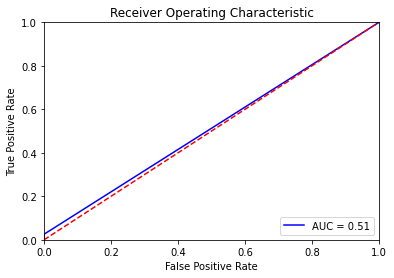

In [85]:
pred = model_svc.predict(X_test)
fp, tp, thresholds = roc_curve(y_test, pred)
roc_auc = metrics.auc(fp, tp)
plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()